## 1. Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [77]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 3. Basic Info

In [78]:
df.shape

(8807, 12)

In [79]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [81]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


## 4. Check for Null Values

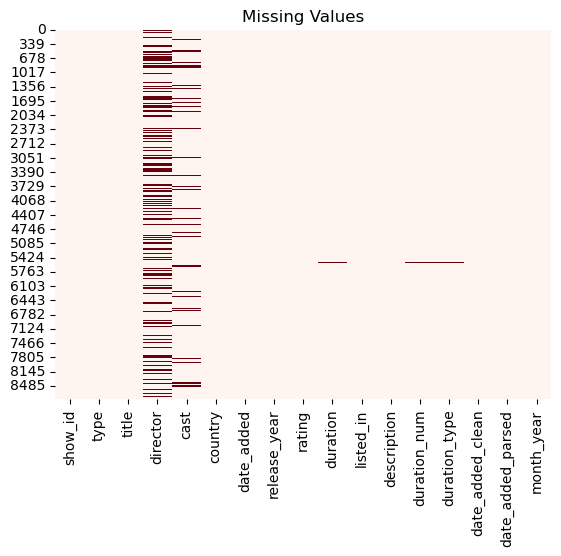

show_id                 0
type                    0
title                   0
director             2624
cast                  825
country                 0
date_added              0
release_year            0
rating                  4
duration                3
listed_in               0
description             0
duration_num            3
duration_type           3
date_added_clean        0
date_added_parsed       0
month_year              0
dtype: int64


In [94]:
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values")
plt.savefig("missing_values_heatmap.png")
plt.show()

print(df.isnull().sum())


## 5. Drop or Fill Missing Values

In [83]:
# Fill missing 'country' with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

## 6. Value Counts for Categorical Columns

In [84]:
print(df['type'].value_counts())
print(df['rating'].value_counts())
print(df['country'].value_counts().head(10))

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


## 7. Visualizations

**a. Count of TV Shows vs Movies**

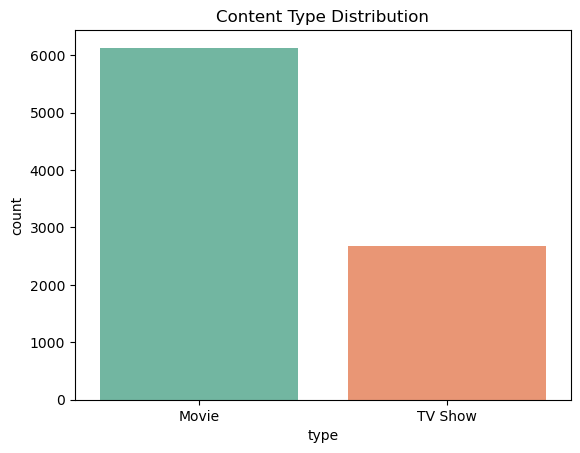

In [85]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Content Type Distribution')
plt.savefig("Content_type_distributio.png")
plt.show()

**b. Top 10 Countries with Most Titles**

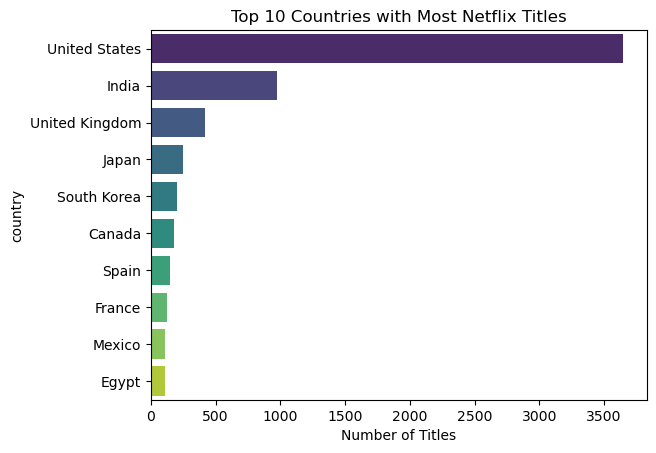

In [86]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.savefig("top_10_Countries_with_Most_Netflix_Titles.png")
plt.show()

**c. Number of Releases Per Year**

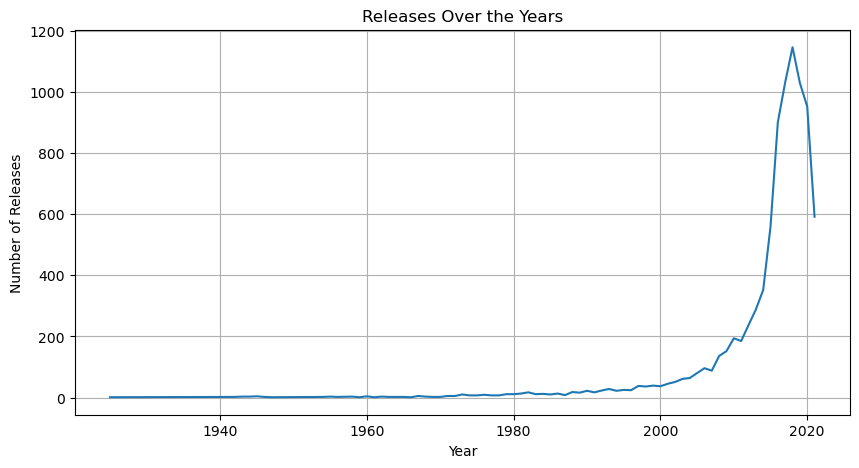

In [87]:
df['release_year'].value_counts().sort_index().plot(kind='line',
                                                    figsize=(10,5))
plt.title('Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.savefig("top_10_Releases_Over_the_Year.png")
plt.show()

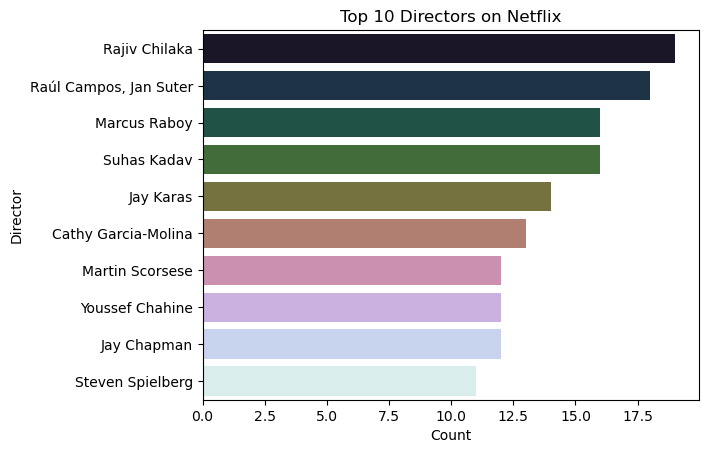

In [88]:
top_directors = df['director'].dropna().value_counts().head(10)
sns.barplot(x=top_directors.values, 
            y=top_directors.index, 
            palette='cubehelix')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Count')
plt.ylabel('Director')
plt.savefig("top_10_Directors_on_Netflix.png")
plt.show()

## 9. Most Common Genres

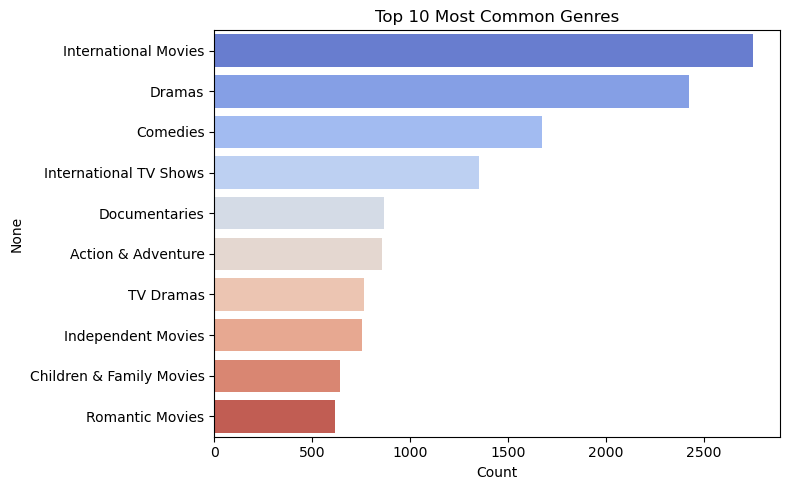

In [89]:
from collections import Counter

# Split and count genres
genre_series = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat_genres = [genre for sublist in genre_series for genre in sublist]
top_genres = pd.Series(Counter(flat_genres)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig("top_10_most_common_genres.png")
plt.show()

## 10. TV Show vs Movie Release Trend Over the Years

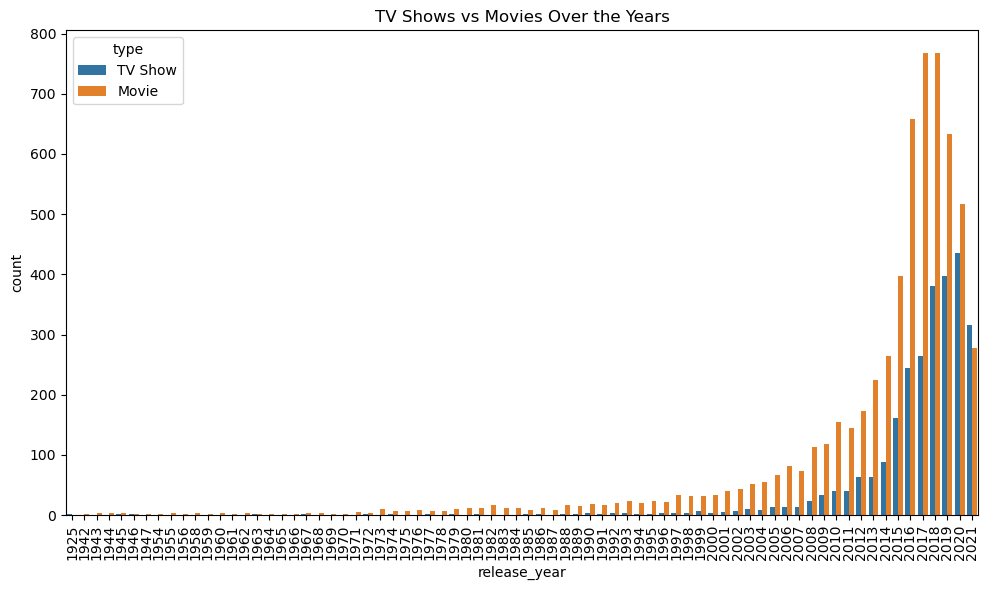

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='release_year', hue='type', order=sorted(df['release_year'].dropna().unique()))
plt.xticks(rotation=90)
plt.title("TV Shows vs Movies Over the Years")
plt.tight_layout()
plt.savefig("tv_vs_movies_trend.png")
plt.show()

## 11. Top Actors/Performers

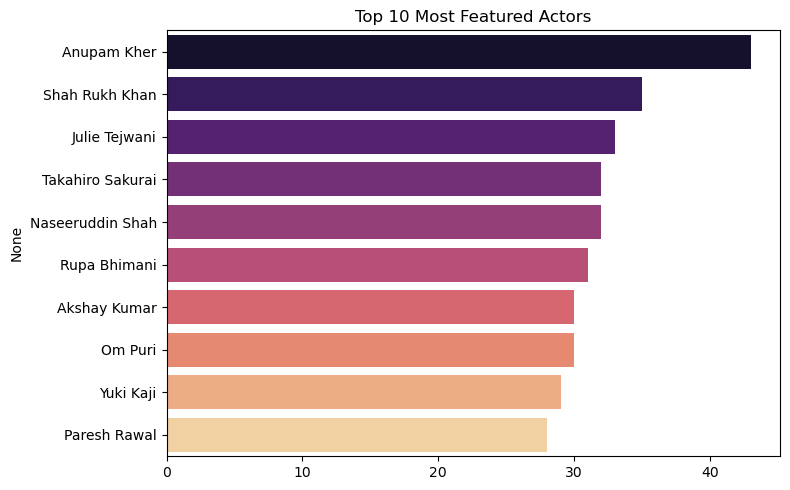

In [91]:
actor_series = df['cast'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat_actors = [actor for sublist in actor_series for actor in sublist]
top_actors = pd.Series(Counter(flat_actors)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='magma')
plt.title("Top 10 Most Featured Actors")
plt.tight_layout()
plt.savefig("top_10_actors.png")
plt.show()

## 12. Duration Analysis: TV Shows vs Movies

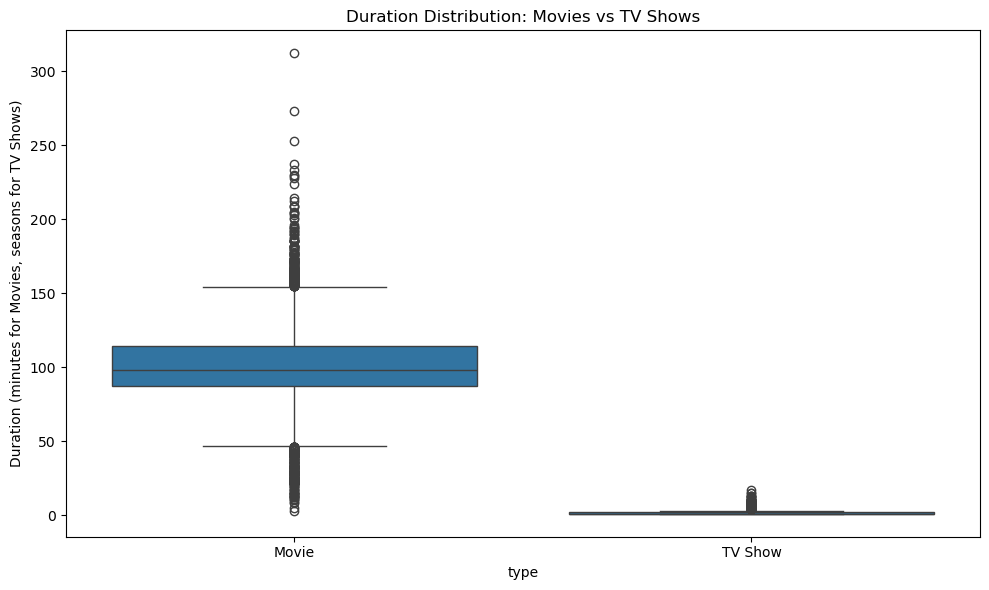

In [92]:
# Split duration into numeric value and unit
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

# Duration distribution
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='duration_num', data=df)
plt.title('Duration Distribution: Movies vs TV Shows')
plt.ylabel('Duration (minutes for Movies, seasons for TV Shows)')
plt.tight_layout()
plt.savefig("duration_distribution.png")
plt.show()

## 13. Monthly Additions to Netflix

Failed to parse 10 entries out of 8807
['nan']


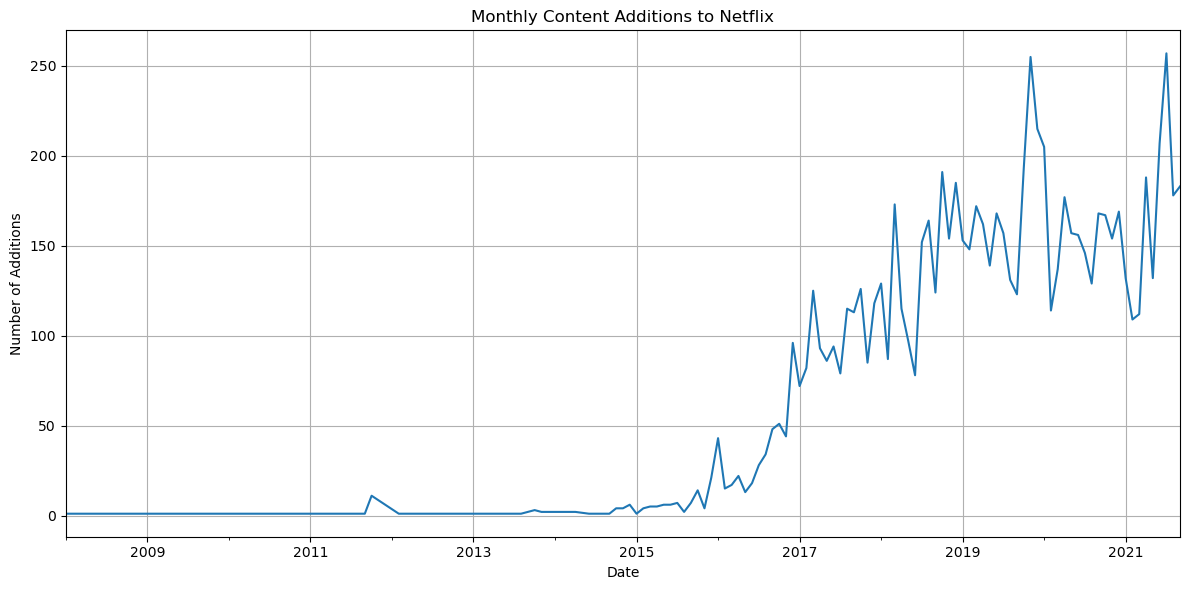

In [93]:
# 1. Strip leading/trailing whitespace
df['date_added_clean'] = df['date_added'].astype(str).str.strip()

# 2. Parse with automatic inference and coerce failures to NaT
df['date_added_parsed'] = pd.to_datetime(
    df['date_added_clean'], 
    format=None,        # let pandas infer format
    errors='coerce',    # invalid parsing → NaT
    infer_datetime_format=True,
)

# 3. Check how many failed to parse
n_failed = df['date_added_parsed'].isna().sum()
print(f"Failed to parse {n_failed} entries out of {len(df)}")

# 4. (Optional) Inspect a few problematic values
print(df.loc[df['date_added_parsed'].isna(), 'date_added_clean'].unique()[:10])

# 5. Now you can safely extract month-year
df = df.dropna(subset=['date_added_parsed'])  # if you want to drop unparsed rows
df['month_year'] = df['date_added_parsed'].dt.to_period('M')

# 6. Replot your monthly additions
monthly_additions = df['month_year'].value_counts().sort_index()
monthly_additions.plot(kind='line', figsize=(12,6))
plt.title('Monthly Content Additions to Netflix')
plt.xlabel('Date')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_additions.png")
plt.show()

# ✅ Final Summary & Conclusions

- Here’s what we discovered from the dataset:

- 🔍 Aspect	==========>📌 Insight
- Content Type =========>	Movies are more frequent than TV Shows.
- Top Countries ========>	The US dominates Netflix's content catalog, followed by India and the UK.
- Year Trend ======>	A huge spike in content addition from 2016–2020.
- Genres ======> The most common genres include Dramas, Documentaries, and Comedies.
- Top Actors =======>	Prominent actors include Anupam Kher, Shah Rukh Khan, and Takahiro Sakurai.
- Top Directors =======>	Directors like Rajiv Chilaka and Jan Suter appear most frequently.
- Movie Duration =======>	Most movies are around 90 minutes, with a few very short or long films.
- TV Show Seasons =======>	Majority of TV shows have 1 or 2 seasons, indicating short-run series.